In [1]:
import os
import warnings 
warnings.filterwarnings('ignore')

from glob import glob
import numpy as np 
import pandas as pd
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
meta = pd.read_csv("D:/New folder (4)/New folder (5)/archive/HAM10000_metadata.csv")
meta

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [3]:
base_skin_dir = os.path.join('..', 'D:/New folder (4)/New folder (5)/archive')

# Dictionary to map image IDs to their corresponding file paths

imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

In [4]:
meta['path'] = meta['image_id'].map(imageid_path_dict.get)

meta

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                                                    path  
0      D:/New folder (4)/New folder (5)/archive\HAM10...  
1      D:/New folder (4)/New folder (5)/archive\HAM10...  
2      D:/New folder (4)/New folder (5)/archive\HAM10...  
3      D:/New folder (4)/New folder (5)/archive\HAM10...  
4      D:/New folder (4)/New folder (5)/archive\HAM10...  
...                                                  ...  
10010  D:/New folder (4)/New folder (5)/archive\HAM10...  
10011  D:/New folder (4)/New folder (5)/archive\HAM10...  
10012  D:/New folder (4)/New folder (5)/archive\HAM10...  
10013  D:/New folder (4)/New folder (5)/archive\HAM10...  
10014  D:/New folder (4)/New folder (5)/archive\HAM10...  

[10015 rows x 8 columns]

In [5]:
meta['dx_code'] = pd.Categorical(meta['dx']).codes

meta

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                                                    path  dx_code  
0      D:/New folder (4)/New folder (5)/archive\HAM10...        2  
1      D:/New folder (4)/New folder (5)/archive\HAM10...        2  
2      D:/New folder (4)/New folder (5)/archive\HAM10...        2  
3      D:/New folder (4)/New folder (5)/archive\HAM10...        2  
4      D:/New folder (4)/New folder (5)/archive\HAM10...        2  
...                                                  ...      ...  
10010  D:/New folder (4)/New folder (5)/archive\HAM10...        0  
10011  D:/New folder (4)/New folder (5)/archive\HAM10...        0  
10012  D:/New folder (4)/New folder (5)/archive\HAM10...        0  
10013  D:/New folder (4)/New folder (5)/archive\HAM10...        0  
10014  D:/New folder (4)/New folder (5)/archive\HAM10...        4  

[10015 rows x 9 columns]

In [6]:
print(meta.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dx_code          0
dtype: int64


In [7]:
meta['age'].fillna((meta['age'].mean()), inplace=True)

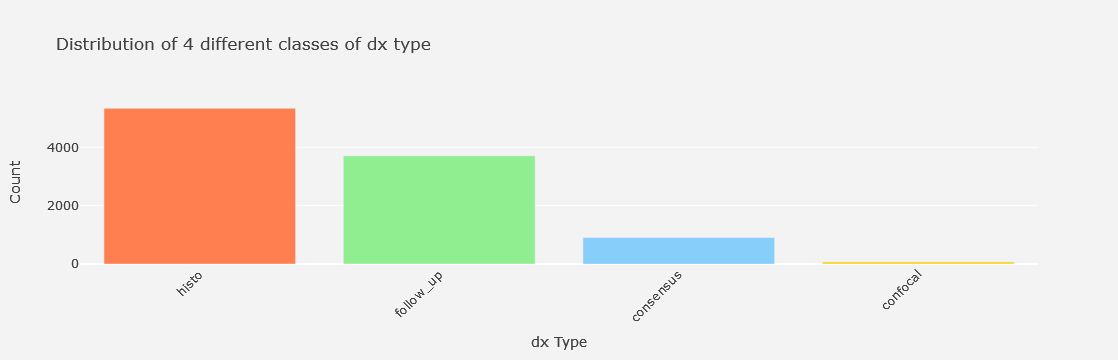

In [8]:
import plotly.graph_objects as go

# Calculate the value counts for each dx type
value_counts = meta['dx_type'].value_counts()

# Define custom colors for the bars
bar_colors = ['rgb(255, 127, 80)', 'rgb(144, 238, 144)', 'rgb(135, 206, 250)', 'rgb(255, 215, 0)']

# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values, marker=dict(color=bar_colors))])

# Customize the layout
fig.update_layout(title='Distribution of 4 different classes of dx type',
                  xaxis_title='dx Type',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',  # Light gray background
                  font=dict(color='rgb(64, 64, 64)')  # Dark gray font color
                  )

# Show the plot
fig.show()

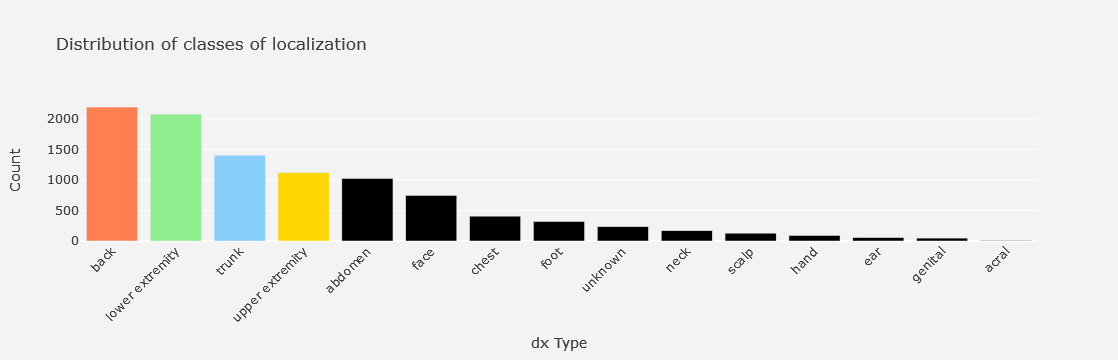

In [9]:
import plotly.graph_objects as go

# Calculate the value counts for each localization
value_counts = meta['localization'].value_counts()

# Define custom colors for the bars
bar_colors = ['rgb(255, 127, 80)', 'rgb(144, 238, 144)', 'rgb(135, 206, 250)', 'rgb(255, 215, 0)']

# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values, marker=dict(color=bar_colors))])

# Customize the layout
fig.update_layout(title='Distribution of classes of localization',
                  xaxis_title='dx Type',
                  yaxis_title='Count',
                  xaxis_tickangle=-45,
                  plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(240, 240, 240, 0.8)',
                  font=dict(color='rgb(64, 64, 64)')
                  )

# Show the plot
fig.show()

In [15]:
!pip install tqdm


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 262.6 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.3 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00


In [10]:
from tqdm import tqdm
import numpy as np
from PIL import Image

image_paths = list(meta['path'])
meta['image'] = [np.asarray(Image.open(path).resize((75, 75)), dtype=np.float32) / 255.0 for path in tqdm(image_paths)]

meta

100%|████████████████████████████████████████████████████████████████████████████| 10015/10015 [02:27<00:00, 67.77it/s]


lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                                                    path  dx_code  \
0      D:/New folder (4)/New folder (5)/archive\HAM10...        2   
1      D:/New folder (4)/New folder (5)/archive\HAM10...        2   
2      D:/New folder (4)/New folder (5)/archive\HAM10...        2   
3      D:/New folder (4)/New folder (5)/archive\HAM10...        2   
4      D:/New folder (4)/New folder (5)/archive\HAM10...        2   
...                                                  ...      ...   
10010  D:/New folder (4)/New folder (5)/archive\HAM10...        0   
10011  D:/New folder (4)/New folder (5)/archive\HAM10...        0   
10012  D:/New folder (4)/New folder (5)/archive\HAM10...        0   
10013  D:/New folder (4)/New folder (5)/archive\HAM10...        0   
10014  D:/New folder (4)/New folder (5)/archive\HAM10...        4   

                                                   image  
0      [[[0.7490196, 0.6, 0.7647059], [0.7490196, 0.6...  
1      [[[0.09411765, 0.050980393, 0.08627451], [0.09...  
2      [[[0.7294118, 0.5019608, 0.54509807], [0.74901...  
3      [[[0.09019608, 0.043137256, 0.07058824], [0.12...  
4      [[[0.53333336, 0.3647059, 0.4509804], [0.6, 0....  
...                                                  ...  
10010  [[[0.60784316, 0.5372549, 0.5803922], [0.6, 0....  
10011  [[[0.019607844, 0.023529412, 0.015686275], [0....  
10012  [[[0.4509804, 0.4117647, 0.41960785], [0.52549...  
10013  [[[0.62352943, 0.48235294, 0.57254905], [0.611...  
10014  [[[0.69411767, 0.57254905, 0.52156866], [0.694...  

[10015 rows x 10 columns]

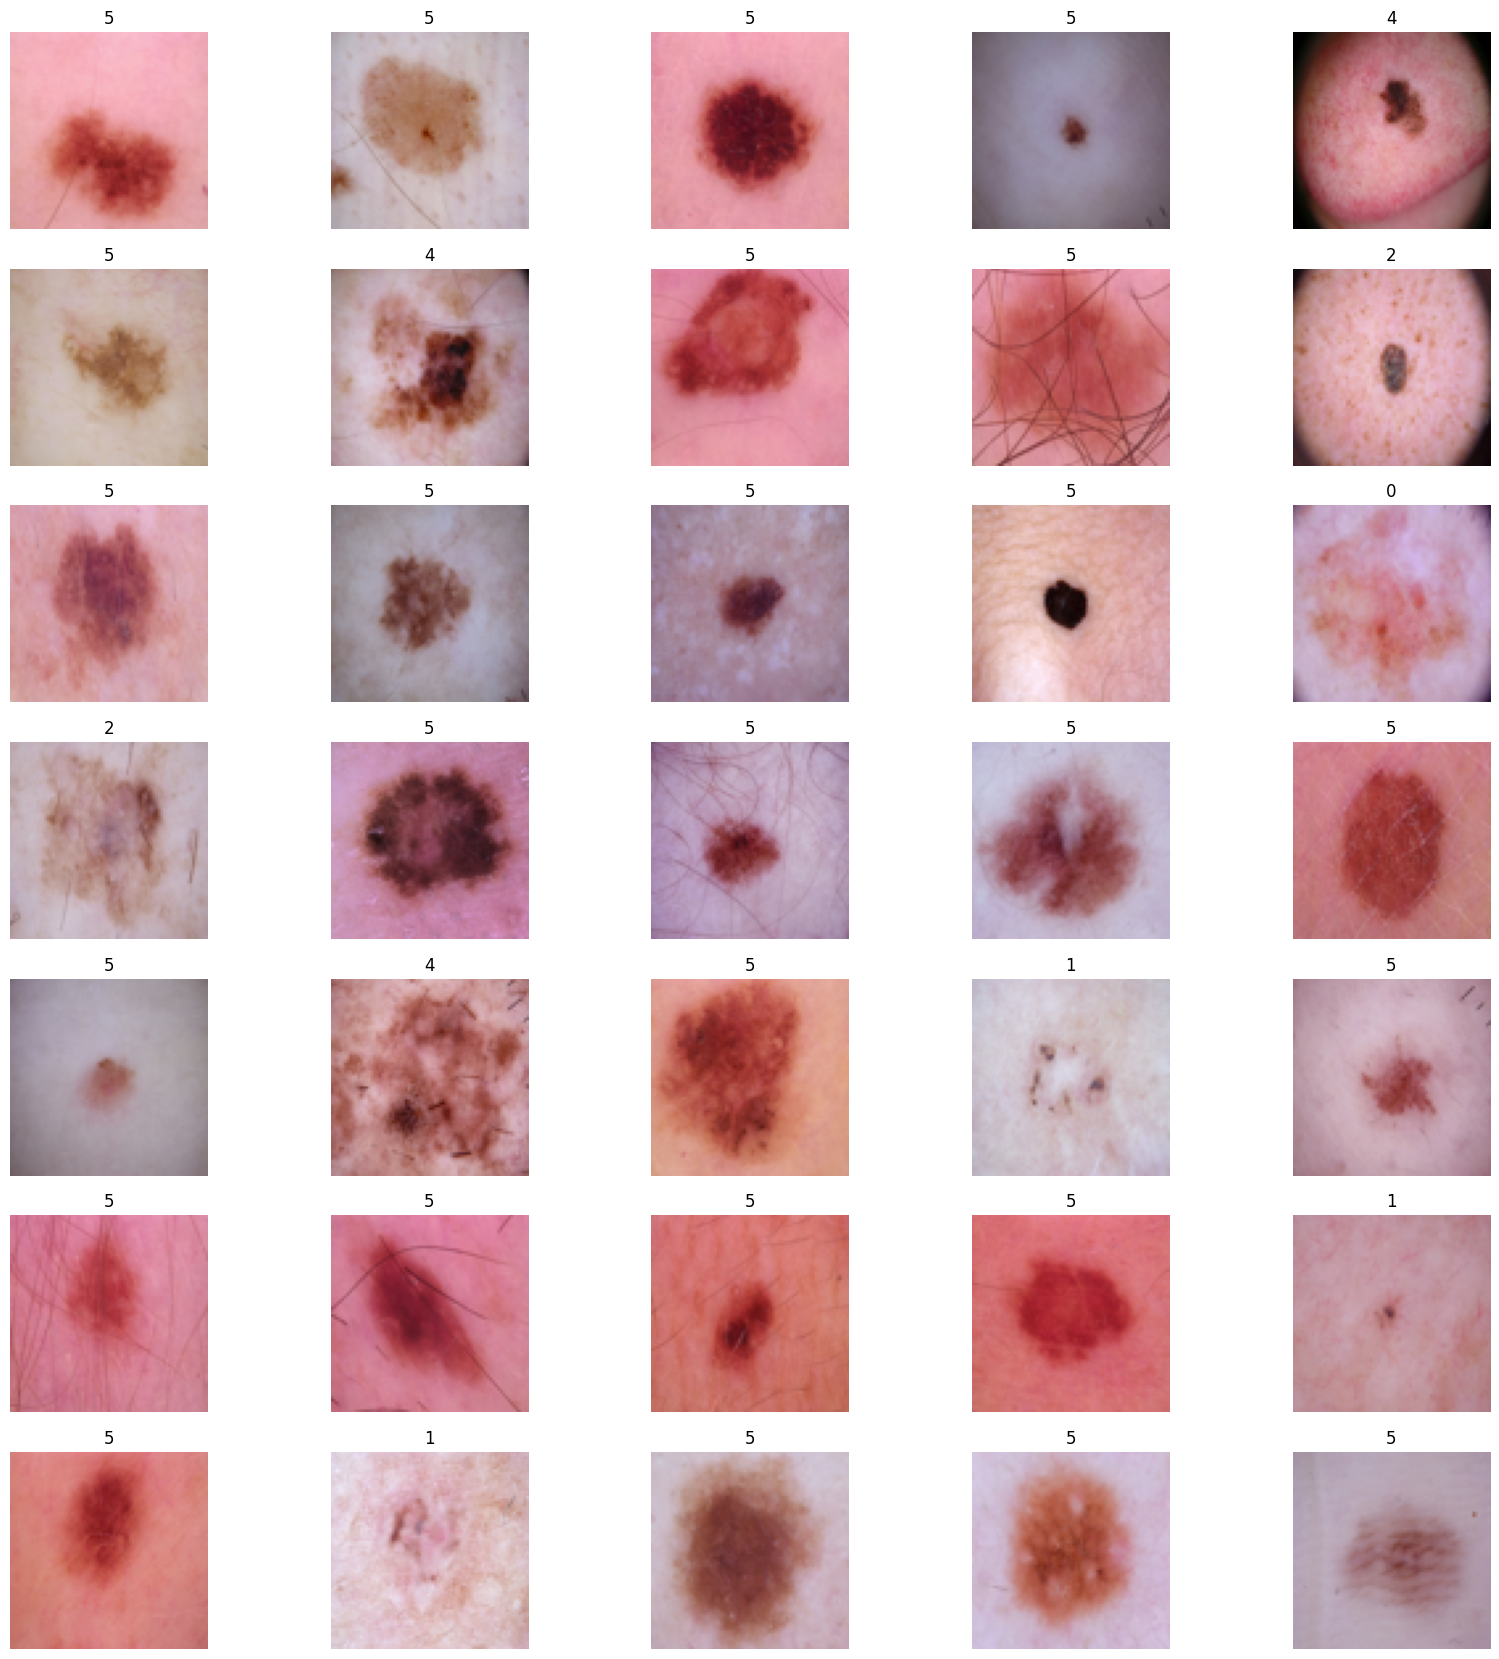

In [11]:
# Create a list of image samples
image_samples = np.random.choice(meta.shape[0], 7 * 5, replace=False)

# Create a figure and subplots
fig, axes = plt.subplots(7, 5, figsize=(4 * 5, 3 * 7))

# Plot the image samples
for i, ax in enumerate(axes.flatten()):
    row = meta.iloc[image_samples[i]]
    ax.imshow(row['image'])
    ax.set_title(row['dx_code'])
    ax.axis('off')

# Save the figure
fig.savefig('category_samples.png', dpi=300)

In [12]:
from keras.utils import to_categorical

X = meta['image']
y = to_categorical(meta['dx_code'])

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
print(X_train.shape , "\n")
print(X_train[1].shape , "\n")

(8012,) 

(75, 75, 3) 



In [15]:
type(X_train)

pandas.core.series.Series

In [16]:
# Convert Pandas Series to NumPy arrays
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())

# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train = X_train.reshape(X_train.shape[0], 75, 75, 3)
X_test = X_test.reshape(X_test.shape[0], 75, 75, 3)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [18]:
# Function to plot the confusion matrix with Plotly
def plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        colorscale = 'Plasma'
    else:
        colorscale = 'Magma_r'  # Reversed 'Magma' colorscale for non-normalized matrix

    annotations = []
    for i in range(len(classes)):
        for j in range(len(classes)):
            annotations.append(
                {
                    'x': classes[j],
                    'y': classes[i],
                    'text': str(cm[i, j]),
                    'showarrow': False,
                    'font': {'color': 'red' if cm[i, j] > 0.5 else 'black'}
                }
            )

    fig = go.Figure(data=go.Heatmap(
        z=cm,
        x=list(classes),
        y=list(classes),
        colorscale=colorscale,
        colorbar=dict(title='Normalized' if normalize else 'Count'),
        showscale=True,
        hoverinfo='z'
    ))

    fig.update_layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted label'),
        yaxis=dict(title='True label'),
        annotations=annotations
    )

    if normalize:
        fig.update_layout(title_text='Normalized Confusion Matrix')
    else:
        fig.update_layout(title_text='Confusion Matrix (Counts)')

    fig.show()

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained DenseNet-121 model (weights pre-trained on ImageNet)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Freeze some layers in the base model
num_layers_to_freeze = 95  # Choose the number of layers you want to freeze
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = BatchNormalization()(x)  # Add BatchNormalization layer for better convergence
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model_dense = Model(inputs=base_model.input, outputs=predictions)

# Learning Rate Scheduler
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,   # Adjust decay_steps 
    decay_rate=0.9       # Adjust decay_rate 
)
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False)

model_dense.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

Epoch 1/200
133/133 [==============================] - 89s 477ms/step - loss: 3.5473 - accuracy: 0.6828 - val_loss: 2.5876 - val_accuracy: 0.7279
Epoch 2/200
133/133 [==============================] - 44s 330ms/step - loss: 1.9932 - accuracy: 0.7684 - val_loss: 1.7083 - val_accuracy: 0.7773
Epoch 3/200
133/133 [==============================] - 45s 339ms/step - loss: 1.3665 - accuracy: 0.7994 - val_loss: 1.2644 - val_accuracy: 0.7813
Epoch 4/200
133/133 [==============================] - 30s 228ms/step - loss: 1.0403 - accuracy: 0.8160 - val_loss: 1.4496 - val_accuracy: 0.7639
Epoch 5/200
133/133 [==============================] - 27s 206ms/step - loss: 0.8039 - accuracy: 0.8271 - val_loss: 0.8495 - val_accuracy: 0.8073
Epoch 6/200
133/133 [==============================] - 29s 221ms/step - loss: 0.6360 - accuracy: 0.8447 - val_loss: 0.7735 - val_accuracy: 0.8113
Epoch 7/200
133/133 [==============================] - 20s 152ms/step - loss: 0.5183 - accuracy: 0.8668 - val_loss: 0.9054 -

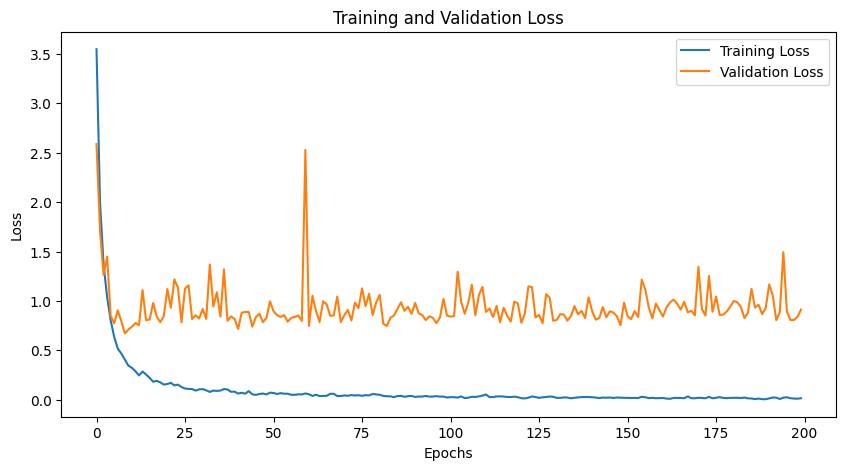

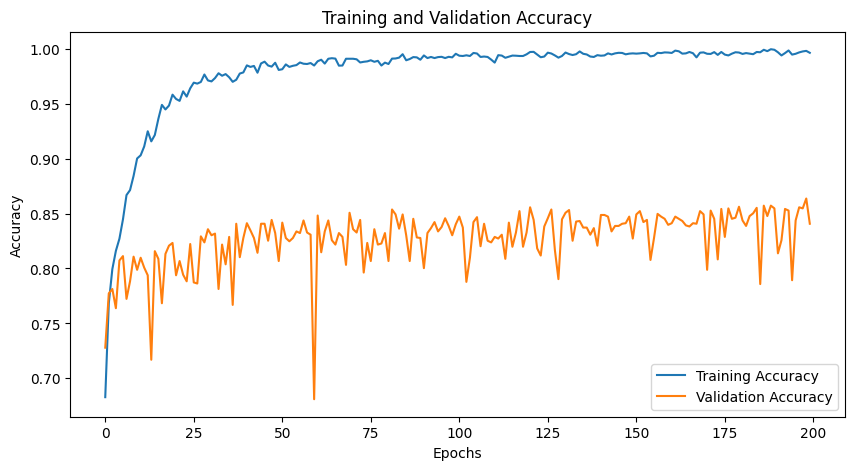

In [36]:
# Fit the model
epochs = 200
batch_size = 60
history = model_dense.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                                    epochs=epochs, verbose=1, steps_per_epoch=X_train.shape[0] // batch_size,
                                     validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [37]:
model_dense.save("DenseNet_new_new.h5")

In [25]:
from tensorflow.keras.models import load_model

In [26]:
loaded_model = load_model("DenseNet.h5")

In [27]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

63/63 [==============================] - 5s 43ms/step


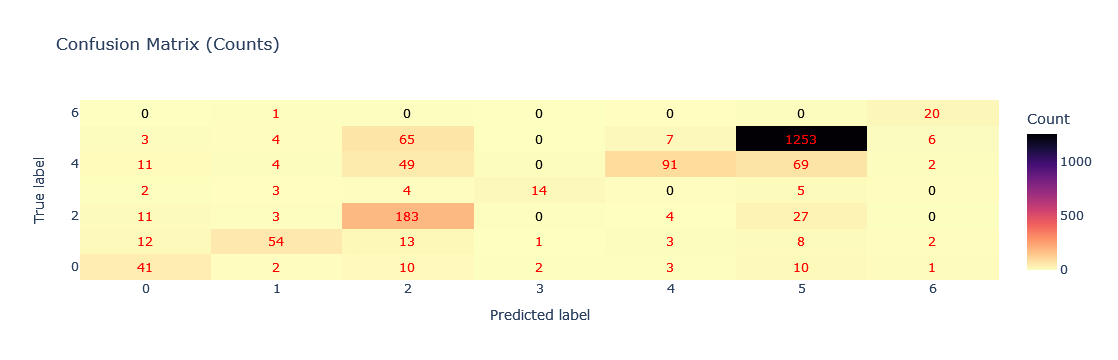

Classification Report for <<DenseNet121>> : 
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        69
           1       0.76      0.58      0.66        93
           2       0.56      0.80      0.66       228
           3       0.82      0.50      0.62        28
           4       0.84      0.40      0.54       226
           5       0.91      0.94      0.92      1338
           6       0.65      0.95      0.77        21

    accuracy                           0.83      2003
   macro avg       0.72      0.68      0.68      2003
weighted avg       0.84      0.83      0.82      2003



In [29]:
from sklearn.metrics import confusion_matrix, classification_report

classes = range(7)
    
# Y_true (true labels) and Y_pred_classes (predicted labels)
Y_pred = model_dense.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<DenseNet121>> : ")
print(report)

In [32]:
split_proportion = 0.8

# Randomly shuffle the rows of the DataFrame
shuffled_data = meta.sample(frac=1, random_state=41)  # random_state for reproducibility

# Calculate the number of rows for the first piece
total_rows = shuffled_data.shape[0]
split_size = int(total_rows * split_proportion)

# Split the DataFrame into two pieces
Train = shuffled_data.iloc[:split_size]
Test = shuffled_data.iloc[split_size:]

In [33]:
from keras.utils import to_categorical

X_train_image = Train['image']
y_train = to_categorical(Train['dx_code'])

X_test_image = Test['image']
y_test = to_categorical(Test['dx_code'])

In [34]:
X_train_image = np.array(X_train_image.tolist())
X_test_image = np.array(X_test_image.tolist())

# Reshape image data in 3 dimensions (height = 75, width = 100, channel = 3)
X_train_image = X_train_image.reshape(X_train_image.shape[0], 75, 100, 3)
X_test_image = X_test_image.reshape(X_test_image.shape[0], 75, 100, 3)

In [35]:
from sklearn.preprocessing import StandardScaler

categorical_data_train = Train[[ 'age' ,'dx_type' ,"localization" ]]
categorical_data_test = Test[[ 'age' ,'dx_type' ,"localization" ]]

# Define the columns you want to scale
columns_to_scale = ['age']

# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the column to a 2D array before fitting the scaler
categorical_data_train[columns_to_scale] = scaler.fit_transform(categorical_data_train[columns_to_scale].values.reshape(-1, 1))
categorical_data_test[columns_to_scale] = scaler.transform(categorical_data_test[columns_to_scale].values.reshape(-1, 1))

In [36]:
# List of columns to one-hot encode
columns_to_encode = ['dx_type', 'localization']

# Perform one-hot encoding using get_dummies
encoded_train = pd.get_dummies(categorical_data_train, columns=columns_to_encode)
encoded_test = pd.get_dummies(categorical_data_test, columns=columns_to_encode)

In [19]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.models import Model
from keras.optimizers import Adam

# Create base InceptionV3 model 
base_model = InceptionV3(input_shape=(75, 75, 3), 
                         include_top=False, weights='imagenet')

# Freeze the base model 
base_model.trainable = False

# Add pooling and new output layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) 
predictions = Dense(7, activation='softmax')(x)

# Create new model 
model_inception = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_inception.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

Epoch 1/200
133/133 [==============================] - 46s 152ms/step - loss: 0.9765 - accuracy: 0.6810 - val_loss: 0.8651 - val_accuracy: 0.6995
Epoch 2/200
133/133 [==============================] - 14s 101ms/step - loss: 0.8226 - accuracy: 0.7132 - val_loss: 0.8596 - val_accuracy: 0.6985
Epoch 3/200
133/133 [==============================] - 13s 97ms/step - loss: 0.7818 - accuracy: 0.7274 - val_loss: 0.8739 - val_accuracy: 0.7084
Epoch 4/200
133/133 [==============================] - 13s 96ms/step - loss: 0.7533 - accuracy: 0.7276 - val_loss: 0.8127 - val_accuracy: 0.7104
Epoch 5/200
133/133 [==============================] - 15s 110ms/step - loss: 0.7338 - accuracy: 0.7334 - val_loss: 0.8362 - val_accuracy: 0.7089
Epoch 6/200
133/133 [==============================] - 10s 74ms/step - loss: 0.6996 - accuracy: 0.7486 - val_loss: 0.8411 - val_accuracy: 0.7044
Epoch 7/200
133/133 [==============================] - 10s 74ms/step - loss: 0.6813 - accuracy: 0.7550 - val_loss: 0.8423 - val

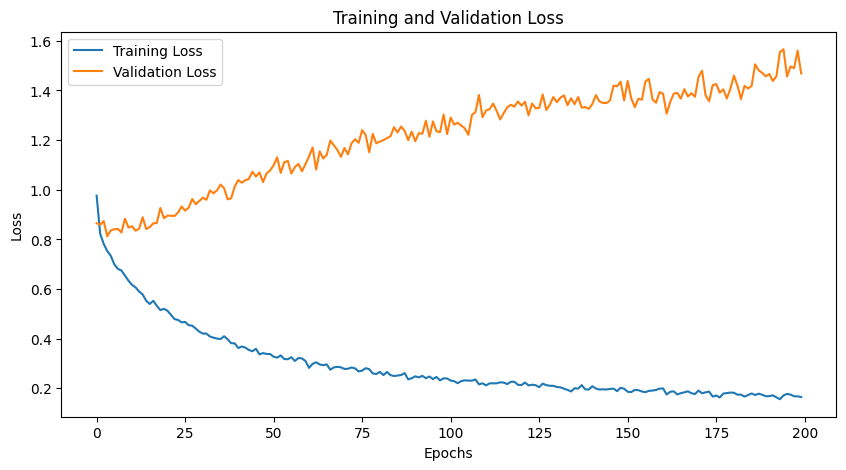

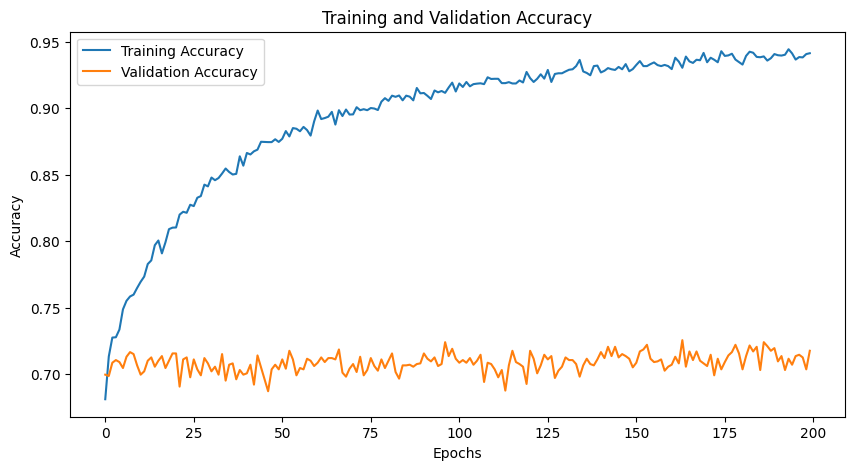

In [20]:
# Fit the model
epochs = 200
batch_size = 60
history = model_inception.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                              validation_data = (X_test,y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [27]:
model_inception.save("InceptioV3_new.h5")

63/63 [==============================] - 2s 21ms/step


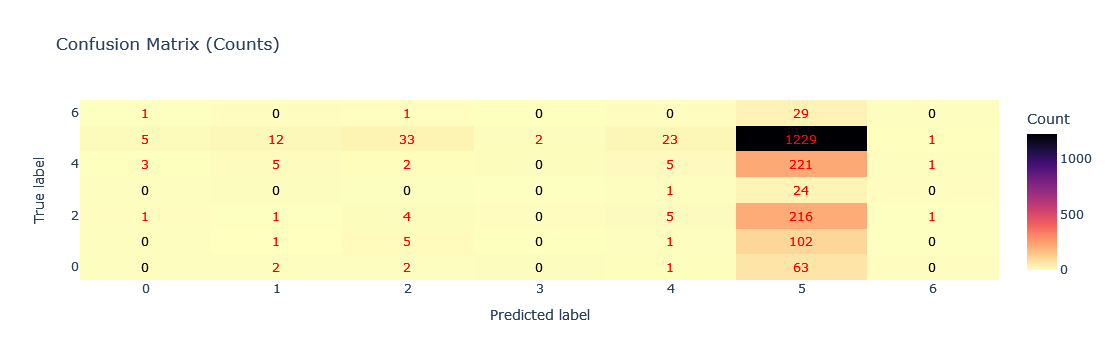

Classification Report for <<InceptionV3>> : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.05      0.01      0.02       109
           2       0.09      0.02      0.03       228
           3       0.00      0.00      0.00        25
           4       0.14      0.02      0.04       237
           5       0.65      0.94      0.77      1305
           6       0.00      0.00      0.00        31

    accuracy                           0.62      2003
   macro avg       0.13      0.14      0.12      2003
weighted avg       0.45      0.62      0.51      2003



In [56]:
Y_pred = model_inception.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix with the new colorscale
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=False)

report = classification_report(Y_true, Y_pred_classes)
print(f"Classification Report for <<InceptionV3>> : ")
print(report)

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have imported necessary libraries including datagen, X_train, y_train, X_test, and y_test

# Create base ResNet50 model 
base_model = ResNet50(input_shape=(75, 75, 3), 
                      include_top=False, weights='imagenet')

# Freeze the base model 
base_model.trainable = False

# Add pooling and new output layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) 
predictions = Dense(7, activation='softmax')(x)

# Create new model 
model_resnet = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_resnet.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [22]:
epochs = 100
batch_size = 64

# Assuming you have defined learning_rate_reduction
# learning_rate_reduction = ... 

# Assuming you have defined datagen with proper data augmentation configurations

history = model_resnet.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                                     epochs=epochs,
                                     verbose=1,
                                     steps_per_epoch=len(X_train) // batch_size,
                                     callbacks=[learning_rate_reduction, early_stopping],
                                     validation_data=(X_test, y_test))

Epoch 1/100
125/125 [==============================] - 12s 92ms/step - loss: 0.8501 - accuracy: 0.7028 - val_loss: 0.8377 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 11s 84ms/step - loss: 0.8503 - accuracy: 0.7059 - val_loss: 0.9213 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 11s 87ms/step - loss: 0.8552 - accuracy: 0.7031 - val_loss: 0.8697 - val_accuracy: 0.6905 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 11s 89ms/step - loss: 0.8552 - accuracy: 0.7047 - val_loss: 0.8346 - val_accuracy: 0.7034 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 11s 85ms/step - loss: 0.8401 - accuracy: 0.7080 - val_loss: 0.8354 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 11s 87ms/step - loss: 0.8389 - accuracy: 0.7080 - val_loss: 0.8625 - val_accuracy: 0.7019 - lr: 0.0010
Epoch 7/100
125/125 [==============================]

In [30]:
model_resnet.save("ResNet50_new_new.h5")

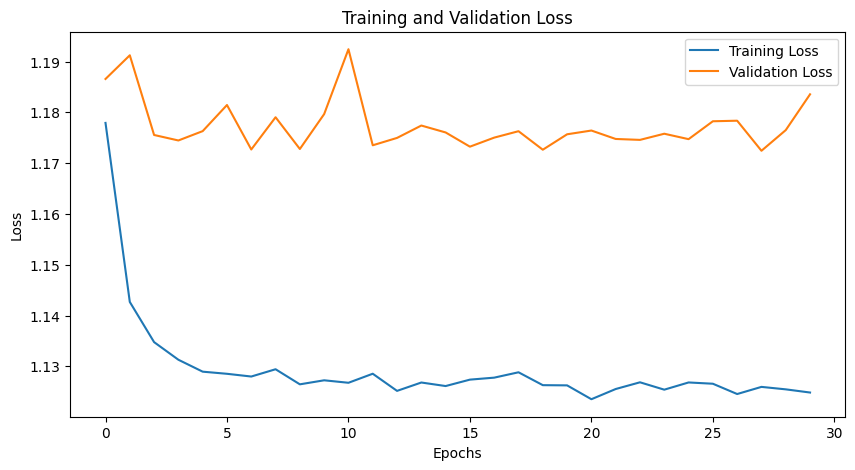

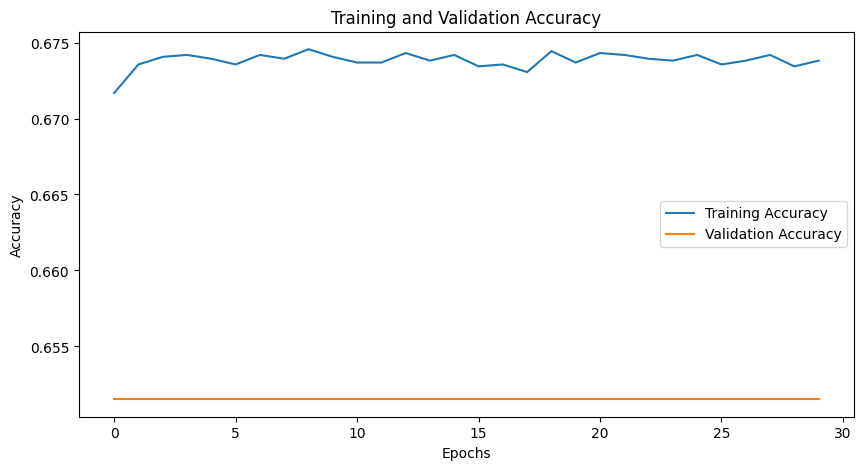

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [84]:
!pip install cv

In [86]:
# import system libs 
import os
import time
import shutil
import itertools

# import data handling tools 

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [87]:
data_dir = 'D:/New folder (4)/New folder (5)/archive/hmnist_28_28_RGB.csv'
data = pd.read_csv(data_dir)
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [88]:
Label = data["label"]
Data = data.drop(columns=["label"])

In [89]:


data["label"].value_counts()



label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

In [91]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 388.9 kB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.6 MB/s eta 0:00:00


In [92]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


In [93]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [94]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [95]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(35201,)
(11734, 28, 28, 3)
(11734,)


In [97]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
import tensorflow as tf

In [3]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

m1 = load_model('models/DenseNet_new.h5')
m1 = Model(inputs=m1.inputs,
                outputs=m1.outputs,
                name='name_of_model_1')
m2 = load_model('models/InceptioV3_new.h5')
m2 = Model(inputs=m2.inputs,
                outputs=m2.outputs,
                name='name_of_model_2')
m3 = load_model('models/ResNet50_new.h5')
m3 = Model(inputs=m3.inputs,
                outputs=m3.outputs,
                name='name_of_model_3')
models = [m1, m2, m3]

In [29]:

model_inputs = tf.keras.Input(shape=(75, 75, 3))
model_outputs = [model(model_inputs) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_inputs, outputs=ensemble_output)

In [ ]:
model_input = tf.keras.Input(shape=(SIZE, SIZE, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [30]:
ensemble_model.compile(
 optimizer='adam',
 loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])

In [ ]:
epochs = 60
batch_size = 1
history = model_inception.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                              validation_data = (X_test,y_test))

In [31]:
epochs = 10
batch_size = 1
history=ensemble_model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                              validation_data = (X_test,y_test))
  

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\kernelapp.py", line 701, in start
      self.io_loop.start()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\asyncio\windows_events.py", line 321, in run_forever
      super().run_forever()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue
      await self.process_one()
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one
      await dispatch(*args)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell
      await result
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
      res = shell.run_cell(
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\MANISH\AppData\Local\Temp\ipykernel_2792\2805028524.py", line 3, in <module>
      history=ensemble_model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\MANISH\.conda\envs\tensorgpu\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1,7] and labels shape [7]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_60368]

In [32]:
resnet152v2_model = create_resnet152v2_model()
resnet152v2_model._name = 'resnet152v2_model'
resnet152v2_model.load_weights("models/ResNet50_new.h5")

NameError: name 'create_resnet152v2_model' is not defined

In [33]:
ResNet_model = load_model("models/ResNet50_new.h5")
ResNet_model._name = 'ResNet_model'

In [34]:
loss, accuracy = ResNet_model.evaluate(test)
print('loss: ',loss, 'accuracy',accuracy)

NameError: name 'test' is not defined